In [71]:
import pandas as pd
import numpy as np
import cloudpickle
import sklearn

from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()

from sklearn import metrics
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, KFold

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

df=pd.read_csv("../../assets/assignment/df_train.csv.gz")
#df = df['overall_ranking'].dropna()
events=df['event.id'].unique()

df.loc[df.query("`sex` not in ['Male','Female']").index, 'sex']=0

df.loc[df.query("`sex` == 'Male'").index, 'sex']=2
df.loc[df.query("`sex` == 'Female'").index, 'sex']=1

df['sex'] = df['sex'].astype(int)

   
df['clean_categories_run_count']=df['clean_categories.name'].replace({'15k':15, '5k':5, 'marathon':42.195, 'half marathon':21.0975, '10k':10, '5 mile':8.04672,
'8k':8,'5k run':5, '3k walk':0, '10k run':10, 'youth mile':1.60934, '5k run/walk':5,
       '5k walk':0, '5 mile run':8.04672, '1 mile run':1.60934, '15k run':15, '10k walk':0,
       '6k run':6, '6k walk':0, '1 mile walk':0, '8k run':8, '8k walk':0,
       '10 mile run':16.0934, '10 mile walk':0, '5 mile walk':0, '30k run':30,
       '30k bike':0, '8 mile run':12.8748, '8 mile walk':0, 'bridge run':10,
       'international half marathon':21.0975, 'u.s. only half marathon':21.0975, '1 mile':1.60934,
       '5.7 mile run':9.17326, '5.7 mile walk':0, '5k competitive walk':0,
       'half marathon run':21.0975, '5k fun walk':0, '5k wheelchair':0,
       '1 mile fun run':1.60934, '2 mile run':3.21869, '2 mile walk':0, '4 mile run/walk':6.43738,
       'life time commitment day 5k':5, 'midnight streak':5,
       'commitment day 5k - master':5, 'quarter marathon':10.54875, '5k walk/run':5,
       '1 mile fun run/walk':1.60934, 'one mile fun run':1.60934, '5 km run':5,
       'fire fighter':42.195, 'olympic triathlon':10, 'sprint triathlon':10,
       'olympic duathlon':10, 'sprint duathlon':10, '10k scenic challenge':10,
       'run swim run':50, 'half marathon walk':0, 'mini-marathon':21.0975})

df['clean_categories_walk_count']=df['clean_categories.name'].replace({'15k':0, '5k':0, 'marathon':0, 'half marathon':0, '10k':0, '5 mile':0,
       '8k':0,'5k run':0, '3k walk':3, '10k run':0, 'youth mile':0, '5k run/walk':0,
       '5k walk':5, '5 mile run':0, '1 mile run':0, '15k run':0, '10k walk':10,
       '6k run':0, '6k walk':6, '1 mile walk':1.60934, '8k run':0, '8k walk':8,
       '10 mile run':0, '10 mile walk':16.0934, '5 mile walk':8.04672, '30k run':0,
       '30k bike':0, '8 mile run':0, '8 mile walk':12.9748, 'bridge run':0,
       'international half marathon':0, 'u.s. only half marathon':0, '1 mile':0,
       '5.7 mile run':0, '5.7 mile walk':9.17326, '5k competitive walk':5,
       'half marathon run':0, '5k fun walk':5, '5k wheelchair':0,
       '1 mile fun run':0, '2 mile run':0, '2 mile walk':3.21869, '4 mile run/walk':0,
       'life time commitment day 5k':0, 'midnight streak':0,
       'commitment day 5k - master':0, 'quarter marathon':0, '5k walk/run':0,
       '1 mile fun run/walk':0, 'one mile fun run':0, '5 km run':0,
       'fire fighter':0, 'olympic triathlon':0, 'sprint triathlon':0,
       'olympic duathlon':0, 'sprint duathlon':0, '10k scenic challenge':0,
       'run swim run':0, 'half marathon walk':21.0975, 'mini-marathon':0})

#walk_count = df['clean_categories_walk_count'].unique()
#run_count = df['clean_categories_run_count'].unique()

df.loc[df.query("`age` >= 119").index, 'age']=np.nan
df.loc[df.query("`age` <= 18").index, 'age']=np.nan
df.loc[df['age'] == 'nan', 'age'] = 38
df['age']=df['age'].replace(np.nan,38)

df['price']=df['price'].replace(np.nan,49.0)

df['bib']=df['bib'].replace(np.nan,5202.0)

df['counts.participants.expected']=df['counts.participants.expected'].replace(['150-300'],['300'])

df['location.city']=df['location.city'].replace(['Oklahoma City, OK'],['Oklahoma City'])

df['date'] = pd.to_datetime(df['event.date.start'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

#df['event.results_certificate']=df['event.results_certificate'].replace([False,'False','1', 1],[0,0,1,1])
#df['event.photos_faces']=df['event.photos_faces'].replace([False, 'False', '1', 1, 'True'],[0,0,1,1,1]

df['result.primary_bracket']=df['result.primary_bracket'].replace(['Overall', 'Wheelchair', 'nan', 'Male', 'Female', 'Male 25-29',
       'Male 40-44', 'Female 25-29', 'Female 20-24', 'wheelchair','WHEELCHAIR'],['Overall','Wheelchair','Overall','Male','Female','Male','Male', 'Female', 'Female','Wheelchair', 'Wheelchair']) 
df['result.primary_bracket']=df['result.primary_bracket'].replace(np.nan,'Overall')
df['result.primary_bracket']=df['result.primary_bracket'].replace(['Wheelchair', 'Overall', 'Male', 'Female'],[1,2,3,4])

#df = df.dropna(subset = ['result.duration.chip'])

#groups=pd.DataFrame(df.groupby(["event.id","clean_categories.name"]).groups.keys(), columns=["event.id","clean_categories.name"])

#train_set=events[100:]
#holdout_set=events[0:100]

#train_set=events[0:100]
#test_set=events[100:200]
#holdout_set=events[200:300]

#train_set = df[(df['year']==2018) | (df['year']==2017)] 
#holdout_set = df[(df["year"]==2016) | (df["year"]==2015) | (df["year"]==2014) | (df["year"]==2013) | (df["year"]==2012)]

#train = df[df['year']==2017] 
#holdout = df[df['year']==2018] 

# We are going to regress on time
#df['result.duration.chip']=pd.to_timedelta(df['result.duration.chip']).astype(int)

# For this demo we are going to use the sequence identifiers, let's look at a
# couple I hand picked
#data=df.query('sequence_id in ["5e862221-758c-48b1-a7cf-11bcc0a80a41","57bdcd1f-a474-43e0-8e54-5f3a5206f5f9"]')
#data.groupby(['sequence_id','event.id']).apply(len)

train_set = events[:100]
holdout_set = events[100:]

#test_set=events[200:300]

train=df.query("`event.id` in @train_set")
#test=df.query("`event.id` in @test_set")
holdout=df.query("`event.id` in @holdout_set")

# We see that these two sequences have historical event data, and different numbers of runners
# so lets separate this into a training and validation set
#train=data.query("`event.id` in ['57bdcd1f-a474-43e0-8e54-5f3a5206f5f9', '5e862221-758c-48b1-a7cf-11bcc0a80a41']")
#test=data.query("`event.id` not in ['57bdcd1f-a474-43e0-8e54-5f3a5206f5f9', '5e862221-758c-48b1-a7cf-11bcc0a80a41']")

#train=train.groupby(["event.id","clean_categories.name"]).filter(lambda z: len(z)>5)

holdout=holdout.drop(
    columns=['time.end',
             'body.results_certificate',
             'event.results_posted',
            'event.results_posted',
             'event.results_certificate',
             'event.photos_available',
             'event.photos_faces',
             'event.photos_social_sharing',
             'event.results_searchable',
             'corral.id',
             'corral.name',
             'corral.wave',
             'corral.time.close',
             'corral.time.start',
             'result.duration.chip',
             'result.duration.pace',
             'result.rankings',
             'result.splits',
             'result.videos',
             'result.finished',
             'result.disqualified',
             'result.duration'])

holdout=df.groupby(["event.id","clean_categories.name"]).filter(lambda z: len(z)>5)

In [72]:
#check_nan = df['result.primary_bracket'].isnull().sum()
#check_nan

0

In [73]:
#df['result.primary_bracket'].unique()

array([2, 1, 3, 4])

In [16]:
#train_set['age'].head()

0    38.0
1    32.0
2    36.0
3    44.0
4    44.0
Name: age, dtype: float64

In [59]:
#train.shape

(242443, 126)

In [60]:
#test.shape

(51090, 126)

In [61]:
#holdout.shape

(293522, 126)

In [40]:
#df[df['year']==2018].shape

In [41]:
#df[df['year']==2017].shape

In [42]:
#df[df['year']==2016].shape

In [43]:
#df[df['year']==2015].shape

In [44]:
#df[df['year']==2014].shape

In [45]:
#df[df['year']==2013].shape

In [46]:
#df[df['year']==2012].shape

In [47]:
#groups=pd.DataFrame(df.groupby(["event.id","clean_categories.name"]).groups.keys(), columns=["event.id","clean_categories.name"])
#groups=pd.DataFrame(df.groupby(["event.id","clean_categories.name"]).apply(
#groups

In [48]:
#with pd.option_context('display.max_columns', None):
#    display(groups)

In [49]:
#df['counts.participants.registered'].unique()

In [50]:
#with pd.option_context('display.max_columns', None):
#    display(df)

In [51]:
#check_nan = df['clean_categories.name'].isnull().sum()
#check_nan

In [52]:
#len(df['overall_ranking'].isna()==True)

In [74]:
y=pd.to_timedelta(train['result.duration.chip']).astype(int)
#y=train['overall_ranking']
holdout_data=holdout

In [75]:
# Step 2: Use the autograder!

# I gave you the autograder code, so a next great step is just to copy and paste
# that in your notebook and get used to how it works.
import pandas as pd
import numpy as np
import cloudpickle
import sklearn

# This code simulates the autograder. It is not the full autograder implementation
# but shares an API with the autograder. It expects that your fitted pipeline is
# submitted with the name pipeline.cloudpickle as demonstrated above. This object
# must implement the predict() function. This is done automatically by the sklearn
# Pipeline object if the last element of your pipeline is a classifier which has
# a predict() function. If you are not submitting a Pipeline, and want to do something
# different, you *must* have a predict() function of the same method signature, e.g.:
#
#   predict(self, X, **predict_params)->np.ndarray

# Load holdout data, in this case I'll simulate it by loading the training data
#df=pd.read_csv("../../assets/assignment/df_train.csv.gz")

# And evaluate on all 5k races that we didn't consider for training
#holdout_data=df.query("`event.id`!='583f013a-1e54-4906-87f7-2b625206f5f9' and `clean_categories.name`=='5k'")
#holdout_data=holdout

# This is the scoring function to determine model fitness
def score(left: pd.DataFrame, right: pd.DataFrame):
    '''
    Calculates the difference between the left and the right when considering rank of items. 
    This scoring function requires that the two DataFrames have identical indicies, and that
    they each contain only one column of values and no missing values.
    '''
    assert(type(left)==pd.DataFrame)
    assert(type(right)==pd.DataFrame)
    assert(len(left)==len(right))
    assert(not np.any(np.isnan(left)))
    assert(not np.any(np.isnan(right)))
    assert(left.index.equals(right.index))
    # convert to ndarrays
    left=left.squeeze()
    right=right.squeeze()
    return np.sum(np.abs(left-right))/(len(left)*(len(left)-1))

# This function runs the prediction model agains a given event/category pair. It
# intentionally loads the student model each time to avoid accidental leakage of data
# between events.
def evaluate(data, pipeline_file='pipeline.cloudpickle'):
    # Load student pipeline
    fitted_pipe = cloudpickle.load(open(pipeline_file,'rb'))
    
    # Separate out the X and y
    X=list(set(data.columns)-{'overall_ranking'})
    y=['overall_ranking']
    
    # Drop any missing results (DNFs)
    data=data.dropna(subset=['overall_ranking'])
    
    # Ensure there is data to actually predict on
    if len(data)==0:
        return np.nan
    
    # Predict on unseen data
    from IPython.utils import io
    with io.capture_output() as captured:
        predictions=pd.DataFrame(fitted_pipe.predict(data[X]),data.index)
    observed=data[y]
    
    # Generate rankings within this bracket
    observed=pd.DataFrame(data[y].rank(),data.index)

    # Return the ratio of the student score
    return pd.Series({"score":score(observed,predictions)})

# Student solution
pipeline_file='pipeline.cloudpickle'

def autograde(holdout_data):
    # Run prediction on each group
    results=holdout_data.groupby(["event.id","clean_categories.name"]).apply(evaluate, pipeline_file)

    # Display the results, uncomment this for your own display
    results.reset_index()['score'].plot.bar();

    # This is the student final grade
    print(np.average(results))

In [ ]:
#autograde(holdout_data)

In [242]:
# Let's say that I want to include in my pipeline the ratio of men to non-men
# in the race. I can create that with the following:
#sequence_stats=train.groupby(['sequence_id','event.id']).apply(lambda x: sum(x['sex']==1)/len(x)).groupby(['sequence_id']).apply(np.mean)
#sequence_stats

sequence_id
57bdcd1f-a474-43e0-8e54-5f3a5206f5f9    0.678429
5e862221-758c-48b1-a7cf-11bcc0a80a41    0.623711
dtype: float64

In [243]:
# To embed this data in my pipeline, I need to add it to one of the steps - either
# a transformer or an estimator - as an object. Then when this gets serialized as
# part of the pickle process it will be there for estimation. Let's create a new
# transformer which does this, our strategy will be that the __init__ function
# will calculate our sequence stats data and store it in the object, while our
# transform function will add that to unseen data as a column
#import numpy as np

#class SequenceSexRatio(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator):
    
    # this will be called when we first make our pipeline, so we can store things
#    def __init__(self, train):
        # as we want to visualize this later we have to have something in the train
        # attribute, which is the parameter to this function. I'll just make this the 
        # first row of the data coming in.
#        self.train=train.iloc[0]
        
#        self.sequence_stats=train.groupby(['sequence_id','event.id']).apply(
#            lambda x: sum(x['sex']==1)/len(x)).groupby(['sequence_id']).apply(np.mean)
        # you need to name a series in order to merge it later
#        self.sequence_stats.name='sex_sequence_ratio'
    
    # this does nothing interesting
#    def fit(self, data=None, y=None):
#        return self
    
    # this will be called when we want to predict our data, since it will transform
#    def transform(self, data):
        # we can print out some diagnostics here, let's check how many sequences in the
        # data we are trying to transform existing in our historical dataset
#        print(f'The number of sequences which are also in our historical data are {len(set(data["sequence_id"].unique()).intersection(self.sequence_stats.index))}')
        # align on index via a left join
#        newdata=pd.merge(data,self.sequence_stats,left_on='sequence_id',right_index=True,how='left')
        # set our new sex_sequence_ratio column 
#        data['SequenceSexRatio']=newdata['sex_sequence_ratio']
        # return all of the data to the next stage of the pipeline
#        return data

In [76]:
# That assignment should pass the autograder. A more pythonic way to do this, and certainly
# the goal of the sklearn team, is to use pipelines, and reuse transformer objects to do the
# data cleaning. In sklearn pipelines are made up of a sequence of Transformers with the last
# item in the pipeline being an Estimator. You can have Estimators throughout the pipeline
# too, creating new features through modeling. For instance, you could use PCA to reduce the
# dimensionality of features and then learn on principal components instead.

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# We can write a similar model to the above using pipelines and transformers. A good example
# would be to first create a transformer for the columns of sex and age, and get rid of
# everything else while one hot encoding sex


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


cleaner = ColumnTransformer(
    transformers=[
        ("sex", 'passthrough', ['sex']),
        ('age', 'passthrough', ['age']),
        ('price', 'passthrough', ['price']),
        ('counts.participants.expected', 'passthrough', ['counts.participants.expected']),
        ('counts.participants.registered', 'passthrough', ['counts.participants.registered']),
        ('bib', 'passthrough', ['bib']),
        ('clean_categories_run_count', 'passthrough', ['clean_categories_run_count']),
        ('clean_categories_walk_count', 'passthrough', ['clean_categories_walk_count']),
        ('location.state', OneHotEncoder(categories=[['AZ', 'CA', 'CO', 'FL', 'GA', 'IL', 'IN', 'MI', 'MN', 'MO', 'NM',
       'NC', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WV', 'WI']], handle_unknown='ignore'), ['location.state']),
        ('event.date.start', OneHotEncoder(sparse=False,categories=[['2017-12-03', '2018-12-02', '2018-01-07', '2018-03-18',
       '2018-05-06', '2017-10-01', '2018-10-07', '2017-12-17',
       '2018-12-16', '2018-02-04', '2017-06-04', '2017-09-09',
       '2017-10-29', '2018-04-29', '2018-05-05', '2018-06-03',
       '2018-06-07', '2018-06-21', '2018-06-23', '2018-09-08',
       '2018-09-30', '2018-10-14', '2018-10-20', '2018-10-21',
       '2018-11-04', '2018-11-22', '2018-12-31', '2018-03-24',
       '2018-05-12', '2018-05-31', '2018-06-02', '2018-06-16',
       '2018-06-17', '2018-06-30', '2018-07-14', '2018-07-15',
       '2018-07-19', '2018-07-21', '2018-07-28', '2018-08-04',
       '2018-08-11', '2018-08-16', '2018-08-19', '2018-08-25',
       '2018-09-01', '2018-09-29', '2018-10-13', '2018-10-27',
       '2018-11-23', '2018-04-14', '2017-12-10', '2018-12-09',
       '2017-09-17', '2018-09-16', '2018-02-10', '2017-11-05',
       '2018-06-01', '2018-07-27', '2018-09-03', '2018-10-06',
       '2018-11-18', '2018-12-22', '2012-08-11', '2013-01-01',
       '2013-08-10', '2014-09-27', '2015-01-01', '2015-08-15',
       '2015-09-26', '2015-12-12', '2016-03-12', '2016-08-20',
       '2016-08-27', '2016-10-02', '2016-10-22', '2016-12-10',
       '2017-03-11', '2017-08-26', '2017-09-16', '2017-09-23',
       '2017-09-30', '2017-10-28', '2018-03-31', '2018-09-15',
       '2018-11-03', '2018-11-17', '2018-12-01', '2018-09-23',
       '2018-04-07', '2018-02-17', '2018-01-28', '2018-02-03',
       '2016-03-26', '2016-07-16', '2017-03-25', '2017-06-10',
       '2017-07-15', '2018-06-09', '2018-06-10', '2018-03-04',
       '2018-08-18', '2018-09-22']], handle_unknown='ignore'), ['event.date.start']),
        ('result.primary_bracket', 'passthrough', ['result.primary_bracket']),
        ('location.city', OneHotEncoder(categories=[['Scottsdale', 'San Francisco', 'San Diego', 'Arcata', 'Denver',
       'Tampa', 'Atlanta', 'Chicago', 'Highland Park',
       'Elk Grove Village', 'Oak Park', 'Indianapolis', 'Port Huron',
       'Flint', 'Swartz Creek', 'Royal Oak', 'Pinconning', 'Roscommon',
       'Plymouth', 'Algonac', 'Fenton', 'Detroit', 'Pigeon',
       'Bloomfield Hills', 'Rogers City', 'Caseville', 'Montrose',
       'Milford', 'Mackinac Island', 'Sault Ste. Marie', 'East Lansing',
       'Williamston', 'Howell', 'Minneapolis', 'St. Louis', 'Santa Fe',
       'Charlotte', 'Columbus', 'Canal Fulton', 'Brewster', 'Hartville',
       'Strasburg', 'North Canton', 'Clinton', 'Cadiz', 'Dalton',
       'Alliance', 'Barberton', 'Millersburg', 'Peninsula', 'Bolivar',
       'Massillon', 'Canton', 'Akron', 'Oklahoma City', 'Tulsa', 'Norman',
       'Edmond', 'Lawton', 'Stillwater', 'Moore', 'Perry', 'Seiling',
       'Bethany', 'Elk City', 'Sulphur', 'Yukon', 'Beaverton', 'Salem',
       'Albany', 'Philadelphia', 'Nashville', 'Houston', 'Dallas',
       'Virginia Beach', 'Fairfax', 'West Point', 'Seattle',
       'Parkersburg', 'Milwaukee']], handle_unknown='ignore'), ['location.city']),
    ], remainder='drop')

# Then we create a three stage pipeline, where the first step applies the column transformer,
# the next step fills our missing values, and the third step is a regression model. But remember,
# this isn't a simple regression, we need an ordinal classification. To do this we can wrap
# the linear regressor in another class which will transform the regression output. This class
# is called the TransformedTargetRegressor, and we can tell it what function we want to apply
# to the final output before returning the predictions.


def evaluation_function(x):
    '''Must return a ndarray of the rankings in order, the autograder will then create
    a dataframe out of this with x.index as the index. Props to Rachell Calhoun!'''
    return pd.Series(x.squeeze()).rank().values

# We can wrap a linear regressor by setting the inverse_func to evaluation_function
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

#estimators = [('ETR', ExtraTreesRegressor(n_estimators=900, max_depth=4)),('RFR', RandomForestRegressor(n_estimators=50,criterion='squared_error')),('XGBR', XGBRegressor(n_estimators=150, max_depth=1,eta=0.5,subsample=0.1,colsample_bytree=1))]
#reg = TransformedTargetRegressor(regressor=StackingRegressor(estimators=estimators, final_estimator=ExtraTreesRegressor(n_estimators=900, max_depth=4)), inverse_func=evaluation_function)

#estimators = [('ETR', ExtraTreesRegressor())]
#reg=TransformedTargetRegressor(regressor=ExtraTreesRegressor(n_estimators=900, criterion='squared_error', max_depth=4, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None), inverse_func=evaluation_function)
#reg = TransformedTargetRegressor(regressor=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False), inverse_func=evaluation_function)
#reg = TransformedTargetRegressor(regressor=LinearRegression(), inverse_func=evaluation_function)
reg = TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=50,criterion='squared_error'), inverse_func=evaluation_function)

# Now we can build our three part pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
pipe = Pipeline(
    steps=[
        ("cleaner", cleaner),
        ('preprocessor', preprocessor),
        ("fix_nans", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ("regressor", reg)
    ])

# We can display the pipeline to see what it looks like and get a sense of data flow
from sklearn import set_config
set_config(display="diagram")
display(pipe)

Pipeline(steps=[('cleaner',
                 ColumnTransformer(transformers=[('sex', 'passthrough',
                                                  ['sex']),
                                                 ('age', 'passthrough',
                                                  ['age']),
                                                 ('price', 'passthrough',
                                                  ['price']),
                                                 ('counts.participants.expected',
                                                  'passthrough',
                                                  ['counts.participants.expected']),
                                                 ('counts.participants.registered',
                                                  'passthrough',
                                                  ['counts.participants.registered']),
                                                 ('bib', 'passthrough',
                                                  ['bib']),
                                                 ('c...
                                                                             'Montrose',
                                                                             'Milford',
                                                                             'Mackinac '
                                                                             'Island',
                                                                             'Sault '
                                                                             'Ste. '
                                                                             'Marie', ...]],
                                                                handle_unknown='ignore'),
                                                  ['location.city'])])),
                ('preprocessor', StandardScaler()),
                ('fix_nans', SimpleImputer(strategy='most_frequent')),
                ('regressor',
                 TransformedTargetRegressor(inverse_func=<function evaluation_function at 0x7f5126ad2700>,
                                            regressor=RandomForestRegressor(n_estimators=50)))])

<Figure size 864x576 with 0 Axes>

In [23]:
#VR = VotingRegressor(estimators=10)
#print('Parameters currently in use:\n')
#print(VR.get_params())

In [124]:
#ETR = ExtraTreesRegressor()
#print('Parameters currently in use:\n')
#print(ETR.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [125]:
#RFR = RandomForestRegressor()
#print('Parameters currently in use:\n')
#print(RFR.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [51]:
#from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, cross_validate, KFold, RepeatedKFold

In [57]:
#check_nan = df['clean_categories_walk_count'].isnull().sum()
#check_nan

In [58]:
#df['age'].unique()

In [26]:
#features = train[['sex','age','clean_categories_run_count','clean_categories_walk_count']]
#features=features.head(51080)
#features.shape

(51090, 4)

In [28]:
#features_20000 = features.iloc[0:19999]
#features_20000.shape

(19999, 4)

In [29]:
#y_20000 = y.iloc[0:19999]
#y_20000.shape

(19999,)

In [30]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(features_20000,y_20000,random_state=0,test_size=0.2, train_size=0.8)

In [11]:
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# identify parameters
#param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 600, 700, 800, 900, 1000], 
#            'max_depth' : [1,2,3,4]} 

# perform grid search
# specify model
#ETR = ExtraTreesRegressor()
#grid_pipeline_train_ETR = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=folds, verbose=0)
#grid_pipeline_train_ETR.fit(X_train, y_train)
#grid_pipeline_train_ETR.best_params_

In [34]:
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# identify parameters
#param_grid = {'verbose': [True,False]} 

# perform grid search
# specify model
#estimators = [('ETR', ExtraTreesRegressor(n_estimators=900, max_depth=4))]
#VR = VotingRegressor(estimators=estimators)
#grid_pipeline_train_VR = GridSearchCV(estimator=VR, param_grid=param_grid, cv=folds, verbose=0)
#grid_pipeline_train_VR.fit(X_train, y_train)
#grid_pipeline_train_VR.best_params_

[Voting] ...................... (1 of 1) Processing ETR, total=  16.2s
[Voting] ...................... (1 of 1) Processing ETR, total=  16.2s
[Voting] ...................... (1 of 1) Processing ETR, total=  16.2s
[Voting] ...................... (1 of 1) Processing ETR, total=  16.2s
[Voting] ...................... (1 of 1) Processing ETR, total=  16.2s


{'verbose': False}

In [16]:
#from sklearn.model_selection import GridSearchCV
#create a cross-validation scheme
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# identify parameters
#param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 600, 700, 800, 900, 1000], 
#              'criterion' : ['squared_error','poisson','friedman_mse','absolute_error']}  

# perform grid search
# specify model
#RFR = RandomForestRegressor()
#grid_pipeline_train_RFR = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=folds, verbose=0)
#grid_pipeline_train_RFR.fit(X_train, y_train)
#grid_pipeline_train_RFR.best_params_

{'criterion': 'squared_error', 'n_estimators': 50}

In [35]:
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# identify parameters
#param_grid = {'cv': ['int','cross-validation generator','iterable','prefit', None]} 

# perform grid search
# specify model
#estimators = [('ETR', ExtraTreesRegressor(n_estimators=900, max_depth=4)),('RFR', RandomForestRegressor(n_estimators=50,criterion='squared_error')),('XGBR', XGBRegressor(n_estimators=150, max_depth=1,eta=0.5,subsample=0.1,colsample_bytree=1))]
#SR = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor(n_estimators=150, max_depth=1,eta=0.5,subsample=0.1,colsample_bytree=1))
#grid_pipeline_train_SR = GridSearchCV(estimator=SR, param_grid=param_grid, cv=folds,verbose=0)
#grid_pipeline_train_SR.fit(X_train, y_train)
#grid_pipeline_train_SR.best_params_

In [ ]:
#from sklearn.model_selection import GridSearchCV
#create a cross-validation scheme
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# identify parameters
#param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 600, 700, 800, 900, 1000],
#              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
#              'eta':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
#              'subsample':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
#               'colsample_bytree':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}  

# perform grid search
# specify model
#RFR = XGBRegressor()
#grid_pipeline_train_XGBR = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=folds, verbose=0)
#grid_pipeline_train_XGBR.fit(X_train, y_train)
#grid_pipeline_train_XGBR.best_params_

In [69]:
#train.shape

(3453, 132)

In [214]:
#y1 = y.head(3453)
#y1.shape

(3453,)

In [77]:
fitted_pipe = pipe.fit(train, y)

In [211]:
# We now have to fit out pipeline, this will just call the transform() and fit()
# functions of the objects in the pipeline, but will not create new objects.
#fitted_pipe=pipe.fit(train, y1)

The number of sequences which are also in our historical data are 2


In [217]:
#train.shape

(3453, 133)

In [218]:
#test.shape

(4444, 133)

In [197]:
# And we can take that final regression object and observe the coefficients
# to verify that we have four, two for sex, one for sexsequenceratio, and
# one age
#fitted_pipe.steps[-1][1].coef_

In [216]:
#y.shape

(3453,)

In [219]:
#y2 = y.head(4444)
#y2.shape

(3453,)

In [222]:
#test1 = test[:3543]
#test1.shape

(3543, 133)

In [258]:
# Finally we can now try this on unseen data
#fitted_pipe.score(test1, y2)

In [22]:
# define model evaluation method
#cv = KFold(n_splits=5)
# evaluate model
#scores = cross_val_score(fitted_pipe, train, y, scoring='r2', cv=cv)
# force scores to be positive
#scores = abs(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
#scores = cross_val_score(fitted_pipe, train, y, scoring='r2', cv=cv)
#scores

0.14157594363325648

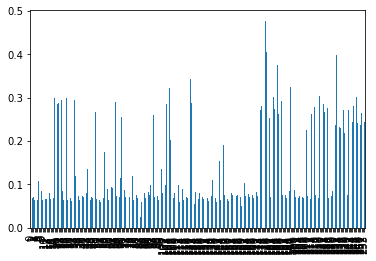

In [78]:
#fitted_pipe = pipe.fit(train, y)

# And we can save it to an output file
cloudpickle.dump(fitted_pipe, open('pipeline.cloudpickle','wb'))

pipeline_file='pipeline.cloudpickle'

# Run prediction on each group
results=holdout_data.groupby(["event.id","clean_categories.name"]).apply(evaluate, pipeline_file)

# Display the results, uncomment this for your own display
results.reset_index()['score'].plot.bar();

# This is the student final grade
np.average(results)

In [ ]:
#marketing_cleaned = (marketing.pipe(drop_missing).pipe(remove_outliers, 'Salary').pipe(to_category))
#cols = df.columns

#1. Drop Rows with Null Columns
#def drop_nulls(df, cols):
#    df.dropna(subset=cols, inplace=True)
#    return df

#2. Fill Null Columns with Av Values
#def fill_vals(df, cols):
#    for i in cols:
#        av=df[i].mean()
#        df[i].fillna(av, inplace=True)
#        return df
    
#3. Replace Strings with numbers and convert type
#def replace_strings(df, cols):
#    df.loc[df.query("'age' >= 119").index, 'age']=np.nan
#    df.loc[df.query("'age' <= 18").index, 'age']=np.nan
#    df['age']=df['age'].replace(np.nan, 38)
#    df['price']=df['price'].replace(np.nan,49.0)
#    df['bib']=df['bib'].replace(np.nan, 5202.0)
#    df['counts.participants.expected']=df['counts.participants.expected'].replace(['150-300'],['300'])
#    df['event.results_certificate']=df['event.results_certificate'].replace([False, 'False', '1', 1],[0,0,1,1])
#    df['result.primary_bracket']=df['result.primary_bracket'].replace(['WHEELCHAIR','nan','Male 25-29','Male 40-44','Female 25-29','Female 20-24','wheelchair'],['Wheelchair','Overall','Male','Male','Female','Female','Wheelchair'])
#    for i in cols:
        #df[i].replace('3+', 4, inplace=True)
#        df[i] = pd.to_numeric(df[i])
        
#        return df
    
#null_cols = ['Gender', 'Married', 'Dependents', 'Credit_History', 'Self_Employed', 'Loan_Amount_Term']
#av_cols = ['LoanAmount']
#rp_cols = ['Dependents']

#df = df.pipe(drop_nulls, null_cols).pipe(fill_vals, av_cols).pipe(replace_strings, rp_cols)

In [ ]:
#y_pred = clf.predict(X)
#import numpy as np
#def my_custom_loss_func(y_true, y_pred):
#    diff = np.abs(y_true - y_pred).max()
#    return np.log1p(diff)

# score will negate the return value of my_custom_loss_func,
# which will be np.log(2), 0.693, given the values for X
# and y defined below.
#score = make_scorer(my_custom_loss_func, greater_is_better=False)
#X = train

#from sklearn.dummy import DummyClassifier
#clf = DummyClassifier(strategy='most_frequent', random_state=0)
#clf = clf.fit(X, y)
#my_custom_loss_func(y, clf.predict(X))

In [ ]:
#score(clf, X, y)